In [9]:
import numpy as np
import matplotlib.pyplot as plt

0.4
4.5 60
30


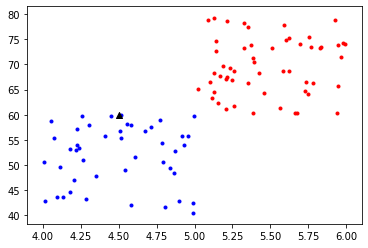

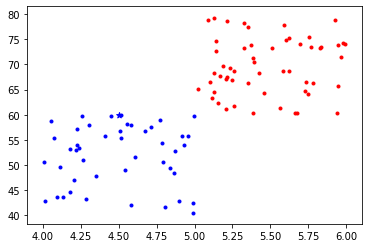

In [10]:
def state_gen(p_kid):
    coin=np.random.rand()
    if(coin<p_kid):
        state=-1
    else:
        state=+1
    return state
def observation_gen(state):
    if(state==-1):
        height=np.random.uniform(4, 5)
        weight=np.random.uniform(40, 60)
    else:
        height=np.random.uniform(5, 6)
        weight=np.random.uniform(60, 80)
    return height, weight
def n_observation_gen(state):
    if(state==-1):
        height=np.random.normal(4, 5)
        weight=np.random.normal(40, 60)
    else:
        height=np.random.normal(5, 6)
        weight=np.random.normal(60, 80)
    return height, weight
def plotter1(dataset, x_new):
    for item in dataset:
        if(item[1]==+1):
            plt.scatter(item[0][0], item[0][1], color='red', marker='.')
        else:
            plt.scatter(item[0][0], item[0][1], color='blue', marker='.')
    plt.scatter(float(x_new[0]), float(x_new[1]), color='black', marker='^')
    plt.show()
def plotter2(dataset, y, x_new):
    for item in dataset:
        if(item[1]==+1):
            plt.scatter(item[0][0], item[0][1], color='red', marker='.')
        else:
            plt.scatter(item[0][0], item[0][1], color='blue', marker='.')
    if(y==+1):
        plt.scatter(float(x_new[0]), float(x_new[1]), color='red', marker='*')
    else:
        plt.scatter(float(x_new[0]), float(x_new[1]), color='blue', marker='*')
    plt.show()
    
def knn(dataset, k, x_new):
    distances=[]
    for ele in dataset:
        distance=dist(ele[0], x_new)
        distances.append([distance, ele[1]])
    distances.sort()
    kid_label_count=0
    adult_label_count=0
    for label in distances[0:k]:
        if(label[1]==-1):
            kid_label_count+=1
        else:
            adult_label_count+=1
    if(kid_label_count>adult_label_count):
        y=-1
    else:
        y=+1
    return y
    
def dist(p1, p2):
    [p2[0], p2[1]]=[float(p2[0]), float(p2[1])]
    p1=np.array(p1)
    p2=np.array(p2)
    return np.linalg.norm(p1-p2)
    
# taking inputs
p_kid=float(input())
x_new=list(map(float, input().split()))
k=int(input())
#creating dataset
dataset=[]
for i in range(100):
    state=state_gen(p_kid)
    height, weight=observation_gen(state)
    dataset.append([[height, weight], state])
#calling function
plotter1(dataset, x_new)
y=knn(dataset, k, x_new)
plotter2(dataset, y, x_new)

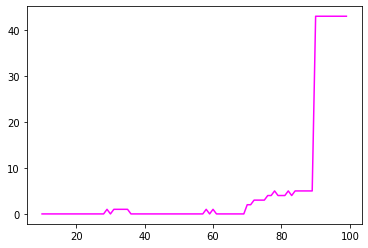

In [11]:
test_dataset=[]
for i in range(100):
    state=state_gen(p_kid)
    height, weight=observation_gen(state)
    test_dataset.append([[height, weight], state])
loss_list=[]
k_list=[]
for k in range(10, 100):
    loss=0
    for point in test_dataset:
        y=knn(dataset, k, point[0])
        if(y!=point[1]):
            loss+=1
    loss_list.append(loss)
    k_list.append(k)
plt.plot(k_list, loss_list, color='magenta')
plt.show()